In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as scon
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [5]:
### define coordinates for your black hole
M   = 10.0 * 1.989e30 # kg
Dls = 3.086e+12      # meters
Dl  = 3.086e+12      # meters
Ds  = 2 * 3.086e+12  # meters
c   = scon.c
G   = scon.G

theta_E = (4 * G * M * Dls / (Ds * Dl *c**2))**(1/2)


### define source plane
Xmin, Xmax = -5e8, 5e8
Ymin, Ymax = -5e8, 5e8
Nx, Ny = int(1e3), int(1e3)

x_source = np.linspace(Xmin, Xmax, Nx)
y_source = np.linspace(Ymin, Ymax, Ny)
x_source, y_source = np.meshgrid(x_source, y_source)

light_source = np.ones(np.shape(x_source))

### calculate phi and beta values
phi_source = np.zeros(np.shape(x_source))
for i in range(Nx):
    for j in range(Ny):
        if x_source[i, j] >= 0:
            phi_source[i, j] = np.arctan(y_source[i, j] / x_source[i, j])
        else:
            phi_source[i, j] = np.pi - np.arctan(-y_source[i, j] / x_source[i, j])

#phi_source = np.arctan(y_source / x_source)
d_vals = np.sqrt(x_source**2 + y_source**2)
b_source = np.arctan(d_vals / Ds)

### calculate theta values for image
theta_plus  = 0.5 * (b_source + np.sqrt(b_source**2 + 4 * theta_E**2))
theta_minus = 0.5 * (b_source - np.sqrt(b_source**2 + 4 * theta_E**2))

### calculate xy values of image in the lens plane
y_im_lens_plus  = Dl * np.tan(theta_plus) * np.sin(phi_source) * light_source
y_im_lens_minus = Dl * np.tan(theta_minus) * np.sin(phi_source) * light_source
x_im_lens_plus  = Dl * np.tan(theta_plus) * np.cos(phi_source) * light_source
x_im_lens_minus = Dl * np.tan(theta_minus) * np.cos(phi_source) * light_source

y_im_lens_plus  = y_im_lens_plus.flatten()
y_im_lens_minus = y_im_lens_minus.flatten()
x_im_lens_plus  = x_im_lens_plus.flatten()
x_im_lens_minus = x_im_lens_minus.flatten()

y_im_lens = np.concatenate((y_im_lens_plus, y_im_lens_minus))
x_im_lens = np.concatenate((x_im_lens_plus, x_im_lens_minus))

y_im_lens = y_im_lens[y_im_lens != 0]
x_im_lens = x_im_lens[x_im_lens != 0]

### calculate xy values of source in the lens plane
y_source_lens = Dl * np.tan(b_source) * np.sin(phi_source) * light_source
x_source_lens = Dl * np.tan(b_source) * np.cos(phi_source) * light_source

y_source_lens = y_source_lens.flatten()
x_source_lens = x_source_lens.flatten()

y_source_lens = np.concatenate((y_source_lens, y_source_lens))
x_source_lens = np.concatenate((x_source_lens, x_source_lens))

y_source_lens = y_source_lens[y_source_lens != 0]
x_source_lens = x_source_lens[x_source_lens != 0]

### check that intensity of light is same for source and lens images
print("Source Intensity = ", np.shape(y_source_lens))
print("Image Intensity  = ", np.shape(y_im_lens))

Source Intensity =  (2000000,)
Image Intensity  =  (2000000,)


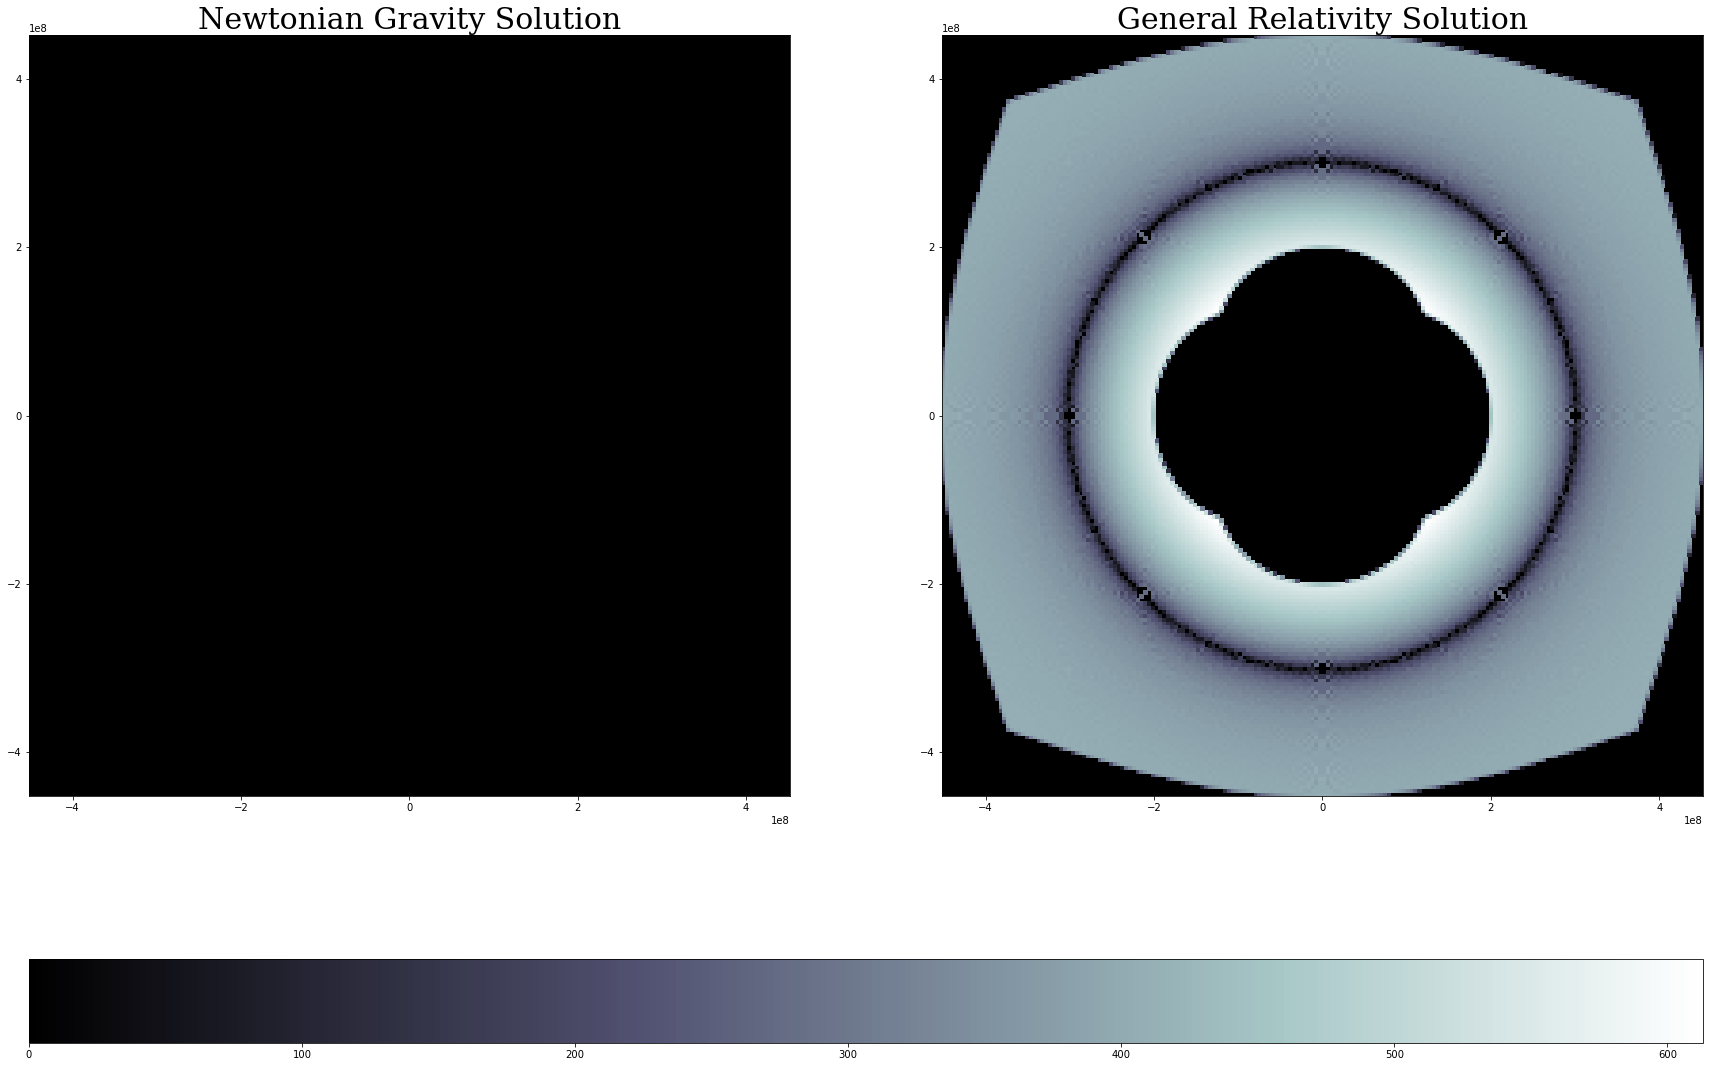

In [10]:
xmin = min([np.min(x_im_lens), np.min(x_source_lens)])
xmax = max([np.max(x_im_lens), np.max(x_source_lens)])
ymin = min([np.min(y_im_lens), np.min(y_source_lens)])
ymax = max([np.max(y_im_lens), np.max(y_source_lens)])

xlim = (xmin, xmax)
ylim = (ymin, ymax)

fig, ax = plt.subplots(1, 2, figsize=(30, 20))
my_map = cm.bone

hsource, xsource, ysource, imsource = ax[0].hist2d(x_source_lens, y_source_lens, bins=200, cmap=my_map, norm=mcolors.LogNorm())
ax[0].set_aspect('equal')
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
ax[0].set_title('Newtonian Gravity Solution', fontsize=30, fontname='serif')
ax[0].set_facecolor('black')

hlens, xlens, ylens, imlens = ax[1].hist2d(x_im_lens, y_im_lens, bins=200, cmap=my_map, norm=mcolors.LogNorm())
ax[1].set_aspect('equal')
ax[1].set_xlim(xlim)
ax[1].set_ylim(ylim)
ax[1].set_title('General Relativity Solution', fontsize=30, fontname='serif')
ax[1].set_facecolor('black')

fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=0, vmax=max([np.max(hlens), np.max(hsource)])),
                                    cmap=my_map), ax=ax, orientation='horizontal', fraction=0.1)

#plt.savefig("./lensing-galaxy-{:04d}.png".format(num))
plt.show()

-1.5697953261282307

1.5707963267948966